# **Imports**

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import dataset through google drive
with open('drive/MyDrive/Housing Prices/sample_submission.csv', 'r') as fp:
 sample_submission = pd.read_csv(fp)

with open('drive/MyDrive/Housing Prices/train.csv', 'r') as fp:
  train = pd.read_csv(fp)

with open('drive/MyDrive/Housing Prices/test.csv', 'r') as fp:
  test = pd.read_csv(fp)

# **Preprocessing**

In [55]:
# set up training and testing split (get rid of Id, just use index)
x_train = train.drop(['Id', 'SalePrice'], axis=1)
y_train = train['SalePrice']
x_test = test.drop('Id', axis=1)
y_test = sample_submission['SalePrice']

In [56]:
print(len(x_train.columns))
print(x_train.columns)

79
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 

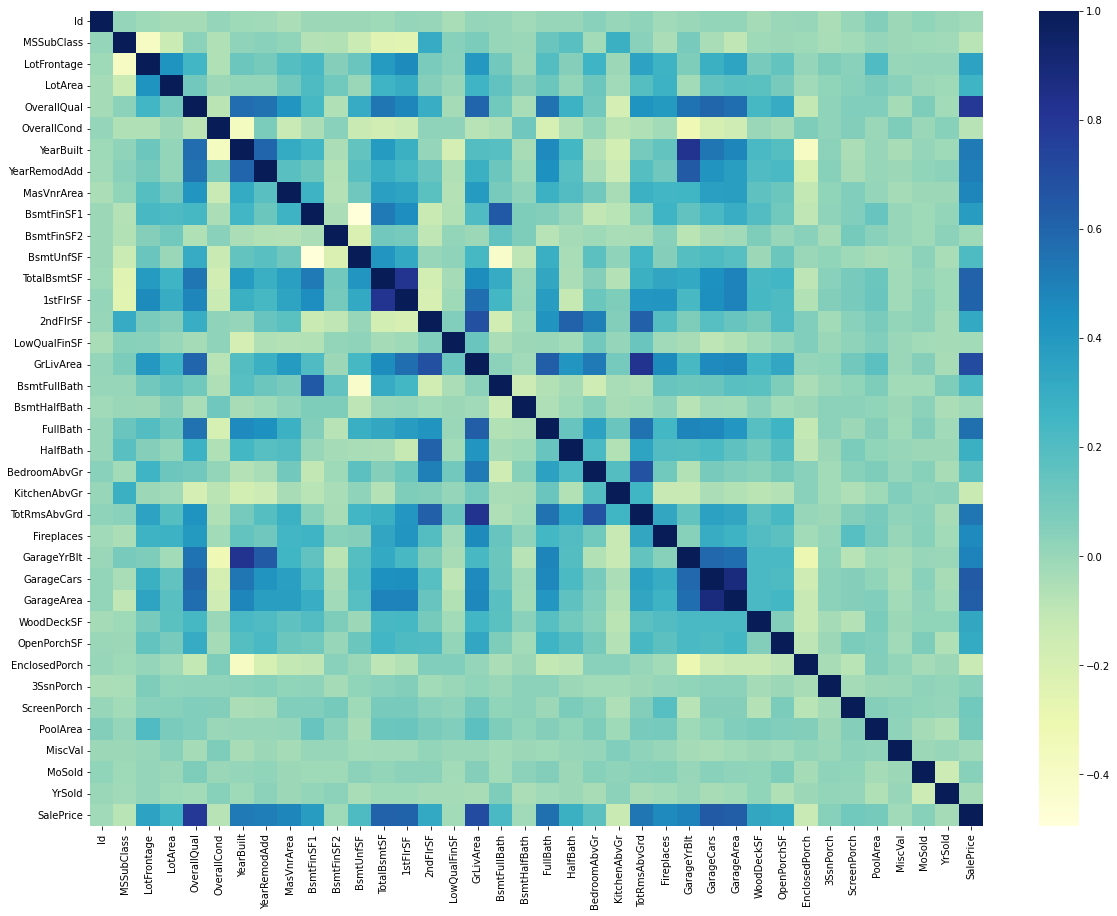

In [57]:
plt.subplots(figsize=(20,15))
sns.heatmap(train.corr(), cmap = "YlGnBu")
plt.show()

In [58]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [59]:
train.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Data columns:
- **NOMINAL DATA -- ONE HOT ENCODING:**
  - MSSubClass
  - MSZoning
  - Street 
  - Alley
  - LotShape 
  - LandContour
  - Utilities
  - LotConfig
  - LandSlope
  - Neighborhood
  - Condition1
  - Condition2
  - BldgType
  - HouseStyle
  - RoofStyle
  - RoofMatl
  - Exterior1st
  - Exterior2nd
  - MasVnrType
  - Foundation
  - Heating
  - CentralAir
  - GarageType
  - MiscFeature
  - SaleType
  - SaleCondition
- **ORDINAL DATA -- LABEL ENCODING:**
  - ExterQual
  - ExterCond
  - BsmtQual
  - BsmtCond
  - BsmtExposure
  - BsmtFinType1
  - BsmtFinType2
  - KitchenQual
  - Functional
  - FireplaceQu
  - GarageFinish
  - GarageQual
  - GarageCond
  - PavedDrive
  - HeatingQC
  - Electrical
  - PoolQC
  - Fence
- **RATIO NUMERICAL DATA:**
  - LotFrontage
  - LotArea
  - MasVnrArea
  - BsmtFinSF1
  - BsmtFinSF2
  - BsmtUnfSF (higher = worse, flip?)
  - TotalBsmtSF
  - 1stFlrSF
  - 2ndFlrSF
  - LowQualFinSF (reverse?)
  - GrLivArea
  - GarageArea
  - WoodDeckSF
  - OpenPorchSF
  - EnclosedPorch
  - 3SsnPorch
  - ScreenPorch
  - PoolArea
  - MiscVal
- **RATIO NUMERICAL COUNT DATA:**
  - BsmtFullBath
  - BsmtHalfBath
  - FullBath
  - HalfBath
  - Bedroom
  - Kitchen
  - TotRmsAbvGrd
  - Fireplaces
  - GarageCars

- **DATES:**
  - YearBuilt
  - YearRemodAdd
  - GarageYrBlt
  - MoSold
  - YrSold

In [61]:
# finalPredictions = pd.DataFrame(test.iloc[:,[0,2]])
# def clean(data):
# #     data['Deck'] = data['Cabin'].str.get(0) # some useful information could be gained from using the cabin feature. We can notice that there is a letter as a prefix 
# # # for the cabin, which could indicate the deck level of the ship. We can extract this and create a new deck feature.
# #     le = LabelEncoder()
# #     for col in ['Sex', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Deck']:
# #         data[col] = le.fit_transform(data[col])
# #     imputer = KNNImputer(n_neighbors = 5)
# #     cols = ['Age', 'Cabin', 'Embarked', 'Deck', 'Fare']
# #     for col in cols:
# #         data[col] = imputer.fit_transform(data[[col]])
# #         data[col] = data[col].astype(int)
# #     data = data.drop(["Ticket", "Cabin", "Name", "PassengerId", "SibSp", "Parch"], axis = 1)
    
#     return data

# train = clean(train)
# test = clean(test)
# train.head()

## **Preprocess - fill missing values:**

In [62]:
# pick out columns missing values
missing_values = []
missing_test = []
for col in x_train.columns:
  if pd.isnull(x_train[col]).sum() > 0:
    missing_values.append(col)
  if pd.isnull(x_test[col]).sum() > 0:
    missing_test.append(col)

In [63]:
# describe missing data
x_train[missing_values].describe(include='all')

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
count,1201.000000,91,1452,1452.000000,1423,1423,1422,1423,1422,1459,770,1379,1379.000000,1379,1379,1379,7,281,54
unique,NaN,2,4,NaN,4,4,4,6,6,5,5,6,NaN,3,5,5,3,4,4
top,NaN,Grvl,None,NaN,TA,TA,No,Unf,Unf,SBrkr,Gd,Attchd,NaN,Unf,TA,TA,Gd,MnPrv,Shed
freq,NaN,50,864,NaN,649,1311,953,430,1256,1334,380,870,NaN,605,1311,1326,3,157,49
mean,70.049958,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978.506164,NaN,NaN,NaN,NaN,NaN,NaN
std,24.284752,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.689725,NaN,NaN,NaN,NaN,NaN,NaN
min,21.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,59.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,69.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,80.000000,NaN,NaN,166.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
x_test[missing_test].describe(include='all')

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
count,1455,1232.000000,107,1457,1458,1458,1443,1444.000000,1415,1414,...,1381.000000,1381,1458.000000,1458.000000,1381,1381,3,290,51,1458
unique,5,NaN,2,1,13,15,4,NaN,4,4,...,NaN,3,NaN,NaN,4,5,2,4,3,9
top,RL,NaN,Grvl,AllPub,VinylSd,VinylSd,None,NaN,TA,TA,...,NaN,Unf,NaN,NaN,TA,TA,Ex,MnPrv,Shed,WD
freq,1114,NaN,70,1457,510,510,878,NaN,634,1295,...,NaN,625,NaN,NaN,1293,1328,2,172,46,1258
mean,NaN,68.580357,NaN,NaN,NaN,NaN,NaN,100.709141,NaN,NaN,...,1977.721217,NaN,1.766118,472.768861,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,22.376841,NaN,NaN,NaN,NaN,NaN,177.625900,NaN,NaN,...,26.431175,NaN,0.775945,217.048611,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,1895.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,58.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,1959.000000,NaN,1.000000,318.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,1979.000000,NaN,2.000000,480.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,164.000000,NaN,NaN,...,2002.000000,NaN,2.000000,576.000000,NaN,NaN,NaN,NaN,NaN,NaN


**x_train Missing Values - num_missing - fill method:**
- LotFrontage - 259 not sure why missing - fill with mean 
- Alley - 1369 (93.77%) missing - fill with NA
- MasVnrType - 8 - existing None category, fill with None
- MasVnrArea - 8 - fill with 0
- BsmtQual - 37 - fill with NA
- BsmtCond - 37 - fill with NA
- BsmtExposure - 38 - fill with NA
- BsmtFinType1 - 37 - fill with NA
- BsmtFinType2 - 38 - fill with NA
- Electrical - 1 - fill with NA
- FireplaceQu - 690 - fill with NA 
- GarageType - 81 - fill with NA
- GarageYrBlt - 81 - fill with mean
- GarageFinish - 81 - fill with NA
- GarageQual - 81 - fill with NA
- GarageCond - 81 - fill with NA
- PoolQC - 1453 (99.5%) missing - fill with NA
- Fence - 1179 (80.75%) missing - fill with NA
- MiscFeature - 1406 (96.3%) missing - fill with NA

In [65]:
# takes care of all missing ordinal data, uses 'NA' placeholder, label encoded to 0 later
missing_ordinal = ['BsmtExposure', 'FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'Alley', 'GarageType', 'MiscFeature', 'KitchenQual']
for col in missing_ordinal:
  x_train[col] = x_train[col].fillna('NA')
  x_test[col] = x_test[col].fillna('NA')

# fill out masonry verneer categories
x_train['MasVnrArea'] = x_train['MasVnrArea'].fillna(0)
x_train['MasVnrType'] = x_train['MasVnrType'].fillna('None')
x_test['MasVnrArea'] = x_test['MasVnrArea'].fillna(0)
x_test['MasVnrType'] = x_test['MasVnrType'].fillna('None')

# fill in lot frontage with mean
x_train['LotFrontage'] = x_train['LotFrontage'].fillna(x_train['LotFrontage'].mean())
x_test['LotFrontage'] = x_test['LotFrontage'].fillna(x_test['LotFrontage'].mean())

# fill in garage year built with mean
x_train['GarageYrBlt'] = x_train['GarageYrBlt'].fillna(x_train['GarageYrBlt'].mean())
x_test['GarageYrBlt'] = x_test['GarageYrBlt'].fillna(x_test['GarageYrBlt'].mean())

In [66]:
# fill out MSZoning missing with top
x_test['MSZoning'] = x_test['MSZoning'].fillna(x_test['MSZoning'].mode().item())

# fill out Utilities missing with top
x_test['Utilities'] = x_test['Utilities'].fillna(x_test['Utilities'].mode().item())

# fill out Exterior1st missing with top
x_test['Exterior1st'] = x_test['Exterior1st'].fillna(x_test['Exterior1st'].mode().item())

# fill out Exterior2nd missing with top
x_test['Exterior2nd'] = x_test['Exterior2nd'].fillna(x_test['Exterior2nd'].mode().item())

# fill out Basement stuff with 0 
x_test['BsmtFinSF1'] = x_test['BsmtFinSF1'].fillna(0)
x_test['BsmtFinSF2'] = x_test['BsmtFinSF2'].fillna(0)
x_test['BsmtUnfSF'] = x_test['BsmtUnfSF'].fillna(0)
x_test['BsmtFullBath'] = x_test['BsmtFullBath'].fillna(0)
x_test['BsmtHalfBath'] = x_test['BsmtHalfBath'].fillna(0)
x_test['TotalBsmtSF'] = x_test['TotalBsmtSF'].fillna(0)

# fill out Functional with top
x_test['Functional'] = x_test['Functional'].fillna(x_test['Functional'].mode().item())

# fill out Garage stuff with 0
x_test['GarageCars'] = x_test['GarageCars'].fillna(0)
x_test['GarageArea'] = x_test['GarageArea'].fillna(0)

# fill out SaleType with top
x_test['SaleType'] = x_test['SaleType'].fillna(x_test['SaleType'].mode().item())

# no more missing data

## **Preprocess - encoding:**

In [67]:
# one hot encoding for categorical data
def one_hot_encoding(categories, x_train=x_train, x_test=x_test):
  train_encoding = pd.get_dummies(x_train[categories])
  test_encoding = pd.get_dummies(x_test[categories])
  x_train = x_train.drop(categories, axis=1)
  x_test = x_test.drop(categories, axis=1)
  x_train = pd.concat([x_train, train_encoding], axis=1)
  x_test = pd.concat([x_test, test_encoding], axis=1)
  return x_train, x_test

In [68]:
nominal_data = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
                'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

# one hot encoding all nominal data
x_train, x_test = one_hot_encoding(nominal_data)

In [69]:
ordinal_data = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

# mapping all ordinal data properly
general_ordinal = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
general_rating_dict = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
for col in general_ordinal:
  x_train[col] = x_train[col].map(general_rating_dict)
  x_test[col] = x_test[col].map(general_rating_dict)

exposure_ordinal = ['BsmtExposure']
exposure_rating_dict = {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
for col in exposure_ordinal:
  x_train[col] = x_train[col].map(exposure_rating_dict)
  x_test[col] = x_test[col].map(exposure_rating_dict)

living_ordinal = ['BsmtFinType1', 'BsmtFinType2']
living_rating_dict = {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
for col in living_ordinal:
  x_train[col] = x_train[col].map(living_rating_dict)
  x_test[col] = x_test[col].map(living_rating_dict)

electrical_ordinal = ['Electrical']
electrical_rating_dict = {'NA': 0, 'FuseP': 1, 'FuseF': 2, 'Mix': 3, 'FuseA': 4, 'SBrkr': 5}
for col in electrical_ordinal:
  x_train[col] = x_train[col].map(electrical_rating_dict)
  x_test[col] = x_test[col].map(electrical_rating_dict)

home_ordinal = ['Functional']
home_rating_dict = {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}
for col in home_ordinal:
  x_train[col] = x_train[col].map(home_rating_dict)
  x_test[col] = x_test[col].map(home_rating_dict)

garage_ordinal = ['GarageFinish']
garage_rating_dict = {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
for col in garage_ordinal:
  x_train[col] = x_train[col].map(garage_rating_dict)
  x_test[col] = x_test[col].map(garage_rating_dict)

driveway_ordinal = ['PavedDrive']
driveway_rating_dict = {'NA': 0, 'N': 1, 'P': 2, 'Y': 3}
for col in driveway_ordinal:
  x_train[col] = x_train[col].map(driveway_rating_dict)
  x_test[col] = x_test[col].map(driveway_rating_dict)

fence_ordinal = ['Fence']
fence_rating_dict = {'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
for col in fence_ordinal:
  x_train[col] = x_train[col].map(fence_rating_dict)
  x_test[col] = x_test[col].map(fence_rating_dict)


## **Preprocess - scaling:**

In [70]:
# min max scaling for ranged data
def min_max_scaling(categories, x_train=x_train, x_test=x_test):
  min_max = MinMaxScaler()
  scaled_train = min_max.fit_transform(x_train[categories].values)
  scaled_test = min_max.fit_transform(x_test[categories].values)
  temp_train = pd.DataFrame(scaled_train, columns=categories, index=x_train.index)
  temp_test = pd.DataFrame(scaled_test, columns=categories, index=x_test.index)
  x_train[categories] = temp_train
  x_test[categories] = temp_test
  return x_train, x_test

In [71]:
# higher = worse (flip?) : 'BsmtUnfSF', 'LowQualFinSF'
ratio_numerical_data = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                        'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
ratio_count_data = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
interval_data = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [72]:
x_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,3.39589,3.083562,3.489041,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,0.57428,0.351054,0.876478,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.00000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.00000,3.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,4.00000,3.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.00000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
# remove extra columns (in x_train but not x_test)
found = False 
for col in x_train.columns:
  for test_col in x_test.columns:
    if test_col == col:
      found = True
  if found == False:
    x_train = x_train.drop(col, axis=1)
  found = False

# **Model Training**

In [74]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
history = linReg.fit(x_train, y_train)

# **Model Testing**

In [75]:
x_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,99.673749,3.397533,3.087731,3.466073,...,0.002056,0.080192,0.002742,0.86292,0.061001,0.005483,0.008225,0.017820,0.825223,0.082248
std,20.561228,4955.517327,1.436812,1.113740,30.390071,21.130467,177.001792,0.586444,0.392637,0.933697,...,0.045314,0.271683,0.052306,0.34405,0.239414,0.073871,0.090348,0.132344,0.379907,0.274837
min,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,68.580357,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,78.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,4.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
from sklearn.metrics import mean_squared_error, confusion_matrix
y_pred = linReg.predict(x_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print('Linear Regression model RMSE : ', error)

Linear Regression model RMSE :  75571.59924455234


In [77]:
# 5 fold cross validation
prediction = cross_val_score(linReg, x_train, y_train, cv=5)
print("Regression 5-fold accuracies: " + str(prediction) + "  -- Average: " + str(np.average(prediction)))

Regression 5-fold accuracies: [0.77016787 0.81610027 0.80195224 0.82661286 0.6446366 ]  -- Average: 0.7718939680826059


In [85]:
preds = pd.DataFrame({'Id': test.Id, 'SalePrice': y_pred})
preds.to_csv('submission.csv', index = False)

In [86]:
preds

,Id,SalePrice
0,1461,108225.320011
1,1462,120741.132269
2,1463,166247.629471
3,1464,174732.255044
4,1465,222196.418676
...,...,...
1454,2915,76648.393289
1455,2916,68162.469713
1456,2917,155023.438541
1457,2918,101108.962543
